In [1]:
GEX_Cohort='GEX_CCG1112_LowMt'
REPO = '../..'
RESULT_DATA = f'{REPO}/data/result/cleaned_files/'
WORKFLOW_DATA = f'{REPO}/data/workflow/'
Manuscript_RESULT = f'{REPO}/data/result/manuscript_table/'
import pandas as pd
import scPipe as sp
import scanpy as sc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
import commentjson
sys.path.append(REPO)
from settings import COLOR_PAlETTE
with open(f'{RESULT_DATA}/ColorMap.json','r') as f:
    colormap = commentjson.load(f)
COLOR_PAlETTE.update(colormap)
import matplotlib.pyplot as plt
plt.style.use(f'{REPO}/paper.mplstyle')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
obs_path = f'{REPO}/data/result/manuscript_table/GEX_OBS.csv'
obs = pd.read_csv(obs_path,index_col=0)

# Prioritize L-R table

In [3]:
interaction_baseline_path = f"{Manuscript_RESULT}/multinichenetr_NR_vs_R_Baseline_Top50_per_group.tsv"
interaction_delta_path = f"{Manuscript_RESULT}/multinichenetr_NR_vs_R_Delta_Top50_per_group.tsv"

In [4]:
cm_bl = pd.read_csv(interaction_baseline_path,sep='\t')
cm_delta = pd.read_csv(interaction_delta_path,sep='\t')
cm_bl['Sender_Cellstate'] ='Shared'
cm_bl['Receiver_Cellstate']='Shared'
cm_delta['Sender_Cellstate'] ='Shared'
cm_delta['Receiver_Cellstate']='Shared'
for celltype in ['CD8T','Myeloid','Tumor','Endothelial','CAF']:
    for cellstate in obs.loc[obs.Celltype==celltype,'Cellstate'].unique():
        sheet_name = cellstate.replace('/','_')  if '/' in cellstate else cellstate
        degs = pd.read_excel(f"{Manuscript_RESULT}/DEGs_{celltype}.xlsx",sheet_name=sheet_name,index_col=0)
        degs = degs.loc[(degs.padj<0.05) & (degs.log2FoldChange>1),:]
        cm_bl.loc[(cm_bl.sender==celltype)&cm_bl.ligand.isin(degs.index),'Sender_Cellstate']=cellstate
        cm_bl.loc[(cm_bl.receiver==celltype)&cm_bl.receptor.isin(degs.index),'Receiver_Cellstate']=cellstate

        cm_delta.loc[(cm_delta.sender==celltype)&cm_delta.ligand.isin(degs.index),'Sender_Cellstate']=cellstate
        cm_delta.loc[(cm_delta.receiver==celltype)&cm_delta.receptor.isin(degs.index),'Receiver_Cellstate']=cellstate

## PD1-PDL1

In [5]:
cm_bl

,group,sender,receiver,ligand,receptor,id,prioritization_score,prioritization_rank,Sender_Cellstate,Receiver_Cellstate
0,NR_Baseline,Tumor,CD8T,NECTIN2,CD96,NECTIN2_CD96_Tumor_CD8T,0.917251,1,Shared,Shared
1,R_Baseline,Myeloid,Myeloid,TNFSF13,TNFRSF1A,TNFSF13_TNFRSF1A_Myeloid_Myeloid,0.904210,1,Shared,Shared
2,R_Baseline,Myeloid,Myeloid,TNFSF13,TNFRSF14,TNFSF13_TNFRSF14_Myeloid_Myeloid,0.897968,2,Shared,Shared
3,NR_Baseline,Tumor,CD8T,NECTIN2,CD226,NECTIN2_CD226_Tumor_CD8T,0.888440,2,Shared,Shared
4,R_Baseline,Myeloid,Myeloid,MMP2,ITGAV,MMP2_ITGAV_Myeloid_Myeloid,0.881408,3,Shared,Shared
5,R_Baseline,Myeloid,Myeloid,TGFB1,ITGAV,TGFB1_ITGAV_Myeloid_Myeloid,0.869347,4,Shared,Shared
6,R_Baseline,Myeloid,Myeloid,TGFBI,ITGAV,TGFBI_ITGAV_Myeloid_Myeloid,0.868702,5,Shared,Shared
7,R_Baseline,Myeloid,Myeloid,ITGAM,ICAM1,ITGAM_ICAM1_Myeloid_Myeloid,0.863199,6,Shared,Shared
8,R_Baseline,Tumor,Myeloid,ADAM17,NOTCH2,ADAM17_NOTCH2_Tumor_Myeloid,0.856980,7,Shared,Shared
9,R_Baseline,Myeloid,Myeloid,HLA.DRB5,CD4,HLA.DRB5_CD4_Myeloid_Myeloid,0.856085,8,Shared,Shared


In [5]:
cellstates_oi = [
    'Tumor.ER-I',
    'Tumor.EMT-III',
    'Macs.MES/Glycolysis',
    'Macs.Proteasomal-degradation',
    'Macs.Lipid-associated',
    'CD8T.Cytotoxic',
    'CD8T.Dysfunction',
    'CD8T.Naive2'
]

In [6]:
# cm_bl.loc[cm_bl.Sender_Cellstate.isin(cellstates_oi)|
#           cm_bl.Receiver_Cellstate.isin(cellstates_oi)
# ,:].to_csv(f"{Manuscript_RESULT }/multinichenetr_NR_vs_R_Baseline_Top50_per_group_OI.tsv",index=False,sep='\t')
cm_bl.loc[
cm_bl.prioritization_rank<=5,:].to_csv(f"{Manuscript_RESULT }/multinichenetr_NR_vs_R_Baseline_Top50_per_group_OI.tsv",index=False,sep='\t')

In [7]:
cm_delta.loc[cm_delta.Sender_Cellstate.isin(cellstates_oi)|
            cm_delta.Receiver_Cellstate.isin(cellstates_oi)
,:].to_csv(f"{Manuscript_RESULT }/multinichenetr_NR_vs_R_Delta_Top50_per_group_OI.tsv",index=False,sep='\t')

In [8]:
cm_delta.loc[(cm_delta.Sender_Cellstate.isin(['Tumor.ER-I','Macs.Lipid-associated','CD8T.Cytotoxic'])&(cm_delta.receiver.isin(['CD8T','Myeloid'])))|
             (cm_delta.Receiver_Cellstate.isin(['Tumor.EMT-III','Tumor.Interferon/MHCII(I)'])&(cm_delta.sender.isin(['CD8T','Myeloid','Tumor'])))
,:].to_csv(f"{Manuscript_RESULT }/multinichenetr_NR_vs_R_Delta_Top50_per_group_OI_subset.tsv",index=False,sep='\t')

In [9]:
cm_delta.Receiver_Cellstate.unique()

array(['Shared', 'CD8T.Cytotoxic', 'Macs.Lipid-associated', 'Macs.MAC1'],
      dtype=object)

## Visualize the Baseline cellstates of interested interaction

## Baseline

In [10]:
from utils.visual import small_sample_box_visual

In [18]:
lr_prod = pd.read_csv(f'{Manuscript_RESULT}/multinichenetr_NR_vs_R_Baseline_sample_prioritization_tbl.tsv',sep='\t')
bl_io = cm_bl.loc[
# (
    # (cm_bl.sender=='Tumor')|
    # (cm_bl.receiver=='Tumor'))&
cm_bl.prioritization_rank<=5,:]
bl_io['Name'] = bl_io.sender + bl_io.Sender_Cellstate.map(lambda x: '' if x=='Shared' else '.'+x.split('.')[1]) +' > '+\
bl_io.receiver + bl_io.Receiver_Cellstate.map(lambda x: '' if x=='Shared' else '.'+x.split('.')[1]) + \
'\n(' +bl_io.ligand + ',' + bl_io.receptor +')'

bl_io['Name2'] = bl_io.sender +' > '+\
bl_io.receiver + \
'\n(' +bl_io.ligand + ',' + bl_io.receptor +')'

lr_prod = lr_prod.loc[lr_prod['id'].isin(bl_io['id']),:]
lr_prod['Name'] = lr_prod['id'].map(bl_io.set_index('id')['Name'].to_dict())
lr_prod['Name'] = pd.Categorical(lr_prod['Name'],
                                bl_io.sort_values(['group','prioritization_score'])['Name'].tolist(),
                                ordered=True)
lr_prod['Name2'] = lr_prod['id'].map(bl_io.set_index('id')['Name2'].to_dict())
lr_prod['Name2'] = pd.Categorical(lr_prod['Name2'],
                                bl_io.sort_values(['group','prioritization_score'])['Name2'].tolist(),
                                ordered=True)

In [22]:
lr_prod.Name.value_counts()

Tumor > Myeloid\n(ZG16B,CXCR4)                                    12
Myeloid.MES/Glycolysis > Myeloid.MES/Glycolysis\n(ALCAM,ALCAM)    12
Tumor > CD8T\n(THBS1,ITGA4)                                       12
Tumor > CD8T\n(NECTIN2,CD226)                                     12
Tumor > CD8T\n(NECTIN2,CD96)                                      12
Myeloid > Myeloid\n(TGFBI,ITGAV)                                  12
Myeloid > Myeloid\n(TGFB1,ITGAV)                                  12
Myeloid > Myeloid\n(MMP2,ITGAV)                                   12
Myeloid > Myeloid\n(TNFSF13,TNFRSF14)                             12
Myeloid > Myeloid\n(TNFSF13,TNFRSF1A)                             12
Name: Name, dtype: int64

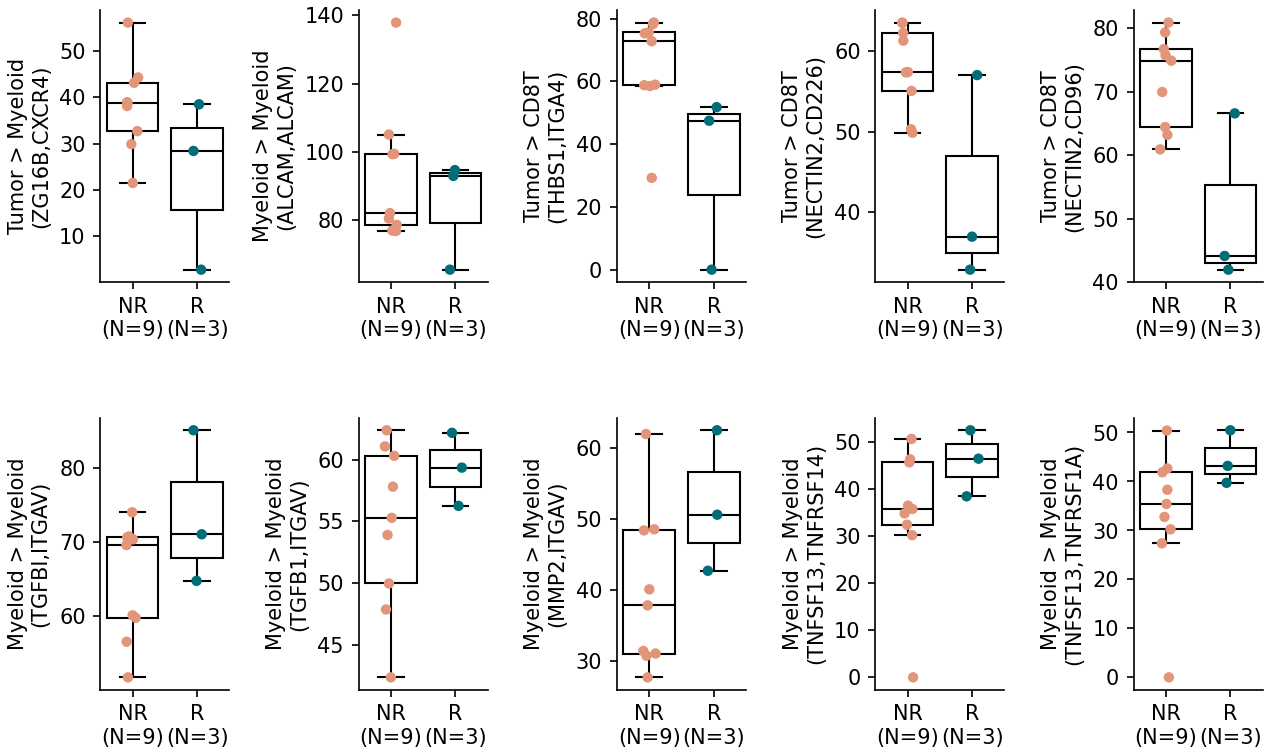

In [19]:
fig,axs = plt.subplots(2,5,dpi=150,figsize=(10,6))#,sharey=True)
axs= axs.flatten()
for i,(lr,data) in enumerate(lr_prod.groupby('Name2')):
    data['group'] =data['group'].str.replace('_Baseline','')
    ax = small_sample_box_visual(
        dt=data,
        x='group',y='ligand_receptor_pb_prod',
        palette={'R':COLOR_PAlETTE['BestResponse']['0-I'],
                'NR':COLOR_PAlETTE['BestResponse']['II-III']},
        ax=axs[i],
        order=['NR','R']
    )
    ax.set(xlabel='',ylabel=lr)
    # ax.set_title(lr,size=9)
plt.subplots_adjust(wspace=1,hspace=.5)
# plt.suptitle('Differential cell cell L-R interactions between baseline samples from NR and R.',y=1.2)

## Delta

In [14]:
lr_prod = pd.read_csv(f'{Manuscript_RESULT}/multinichenetr_NR_vs_R_Delta_sample_prioritization_tbl.tsv',sep='\t')
bl_io = cm_delta.loc[
(cm_delta.prioritization_rank<=5),:]

bl_io['Name'] = bl_io.sender + bl_io.Sender_Cellstate.map(lambda x: '' if x=='Shared' else '.'+x.split('.')[1]) +' > '+\
bl_io.receiver + bl_io.Receiver_Cellstate.map(lambda x: '' if x=='Shared' else '.'+x.split('.')[1]) + \
'\n(' +bl_io.ligand + ',' + bl_io.receptor +')'

bl_io['Name2'] = bl_io.sender +' > '+\
bl_io.receiver + \
'\n(' +bl_io.ligand + ',' + bl_io.receptor +')'

lr_prod = lr_prod.loc[lr_prod['id'].isin(bl_io['id']),:]
lr_prod['Name'] = lr_prod['id'].map(bl_io.set_index('id')['Name'].to_dict())
lr_prod['Name'] = pd.Categorical(lr_prod['Name'],
                                bl_io.sort_values(['group','prioritization_score'])['Name'].tolist(),
                                ordered=True)
lr_prod['Name2'] = lr_prod['id'].map(bl_io.set_index('id')['Name2'].to_dict())
lr_prod['Name2'] = pd.Categorical(lr_prod['Name2'],
                                bl_io.sort_values(['group','prioritization_score'])['Name2'].tolist(),
                                ordered=True)

lr_prod['contrast'] = lr_prod['group'].str.split('_',expand=True)[0]
lr_prod['timepoint'] = pd.Categorical(lr_prod['group'].str.split('_',expand=True)[1],['Baseline','W7D1'],ordered=True)
lr_prod['Patient'] = lr_prod['sample'].str.split('.',expand=True)[0]

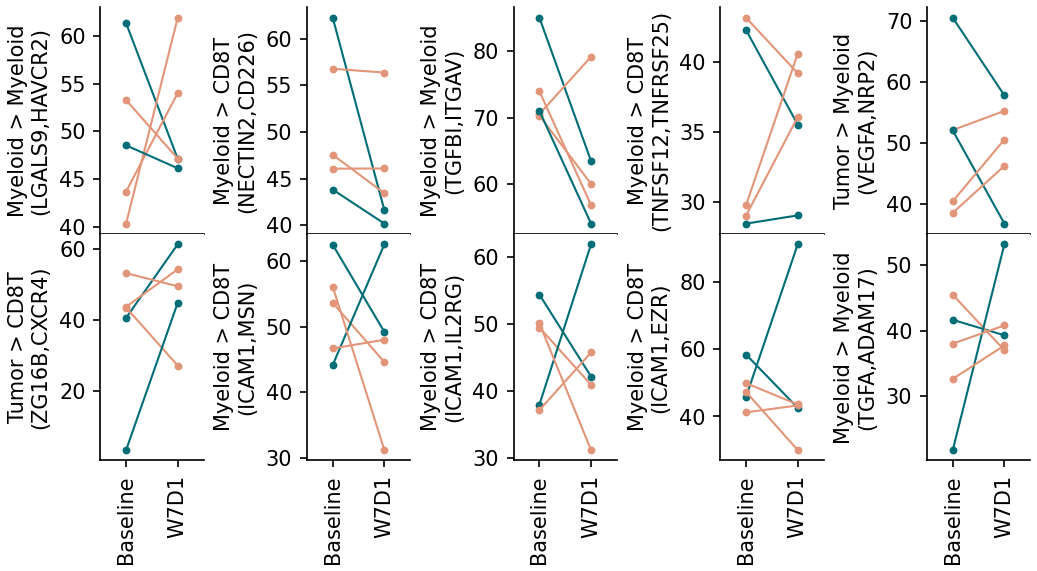

In [15]:
palette=(lr_prod.drop_duplicates(['Patient']).
         set_index('Patient')['contrast'].
         map({'R':COLOR_PAlETTE['BestResponse']['0-I'],
              'NR':COLOR_PAlETTE['BestResponse']['II-III']}).
         to_dict()
        )
fig,axs = plt.subplots(2,5,dpi=150,figsize=(8,4),sharex=True)
axs= axs.flatten()
for i,(lr,data) in enumerate(lr_prod.groupby('Name2')):
    ax=sns.pointplot(data=data,
                     x='timepoint',
                     y='ligand_receptor_pb_prod',
                     hue='Patient',
                     palette=palette,
                     ax=axs[i],
                    markersize=3,
                    linewidth=1)
    ax.legend_.remove()
    ax.set(xlabel='',ylabel=lr)
    if i>4:
        ax.tick_params(axis='x',rotation=90)
plt.subplots_adjust(wspace=1,hspace=0)